# Life Expectancy and GDP

Welcome to my Life Expectancy and GDP Analysis Project! In this Jupyter notebook, I'll delve into the intriguing relationship between Gross Domestic Product (GDP) and life expectancy for six countries. Leveraging data sourced from the World Health Organization and the World Bank, I'll embark on a journey of data analysis, visualization, and exploration to uncover meaningful insights.

## Project Overview

This notebook is organized into several sections:

1. **Importing Libraries**: Begin by importing the necessary Python libraries for data analysis and visualization.

2. **Read Data**: Load the provided CSV dataset containing information about life expectancy and GDP into a Pandas DataFrame. We'll also inspect the dataset to understand its structure.

3. **Data Wrangling**: Prepare the data for analysis by performing necessary data transformations. This includes converting categorical variables, renaming columns, and adding calculated columns.

4. **Exploratory Data Analysis**: Dive into the data by generating summary statistics to gain insights into the dataset's central tendencies and variations.

5. **Data Visualization**: Visualize the relationship between GDP and life expectancy using various plots. We'll explore trends, correlations, and distributions across the selected countries.

6. **GDP and Life Expectancy Growth Analysis**: Analyze the growth of GDP and life expectancy over a specific period for each country, highlighting significant trends.

Let's embark on this data analysis journey and uncover the fascinating connections between GDP and life expectancy!

---

## Installing Packages

In [1]:
# pip install --user plotnine

## Importing Libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.formula.api as smf
from plotnine import *

## Read Data

In [3]:
# reading CSV data to dataframe 'life_expectancy_gdp' using pandas
lifeex = pd.read_csv('dataset/life_expectancy_gdp.csv')

# set  display format for floating-point numbers in Pandas to show two decimal places.
pd.set_option('display.float_format', '{:.2f}'.format)

# inspecting first 10 lines of dataframe 'insurance' using head()
lifeex.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.30,77860932152.00
1,Chile,2001,77.30,70979923960.00
2,Chile,2002,77.80,69736811435.00
3,Chile,2003,77.90,75643459840.00
4,Chile,2004,78.00,99210392858.00
5,Chile,2005,78.40,122965000000.00
6,Chile,2006,78.90,154788000000.00
7,Chile,2007,78.90,173606000000.00
8,Chile,2008,79.60,179638000000.00
9,Chile,2009,79.30,172389000000.00


In [4]:
# determine 'lifeex' data dimensions: get row and column count using shape()
lifeex.shape

(96, 4)

**Summary:** The dataframe consists of 96 rows and 4 columns.

In [5]:
# view data type and non-null entry count using info()
lifeex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


## Data Wrangling

**Step 1:** Country is categorical but coded as object/string. Need to convert for further analysis.

In [6]:
# convert 'sex' to boolean
lifeex['Country'] = lifeex['Country'].astype('category')

In [7]:
# view data type and non-null entry count again after converting variables
lifeex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Country                           96 non-null     category
 1   Year                              96 non-null     int64   
 2   Life expectancy at birth (years)  96 non-null     float64 
 3   GDP                               96 non-null     float64 
dtypes: category(1), float64(2), int64(1)
memory usage: 2.7 KB


**Step 2:** Reformat columnnames to improve readability

In [50]:
# rename the long column name to the shorter name
lifeex.rename({"Life expectancy at birth (years)": "LifeEx"}, axis=1, inplace=True)

# rename United States of America to USA
lifeex.replace('United States of America', 'USA', inplace=True)

# check if the column's name has changed
lifeex.head()

,Country,Year,LifeEx,GDP,GDP_inBill
0,Chile,2000,77.30,77860932152.00,77.86
1,Chile,2001,77.30,70979923960.00,70.98
2,Chile,2002,77.80,69736811435.00,69.74
3,Chile,2003,77.90,75643459840.00,75.64
4,Chile,2004,78.00,99210392858.00,99.21


## Exploratory Data Analysis

### Summary Statistics

In [9]:
# generates descriptive statistics
lifeex.describe()

,Year,LifeEx,GDP,GDP_inBill
count,96.00,96.00,96.00,96.00
mean,2007.50,72.79,3880498570768.40,3880.50
std,4.63,10.67,5197561310975.92,5197.56
min,2000.00,44.30,4415702800.00,4.42
25%,2003.75,74.47,173301750000.00,173.30
50%,2007.50,76.75,1280220000000.00,1280.22
75%,2011.25,78.90,4067510000000.00,4067.51
max,2015.00,81.00,18100000000000.00,18100.00


**Summary:** <br>
The analysis reveals an average life expectancy of 72.79 years, indicating a relatively high value. However, it's worth noting that a minimum average life expectancy as low as 44.30 years highlights the presence of outliers in the dataset.

## Data Visualization

### Assigning Each Country a Unique Color

In [11]:
# Create a list of countries
countries = lifeex['Country'].unique().tolist()

# Define the colors for the plots
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive']
custom_palette = dict([(country, color) for country, color in zip(countries, colors)])

### Plotting GDP and Life Expectation by Year (Time Trend)

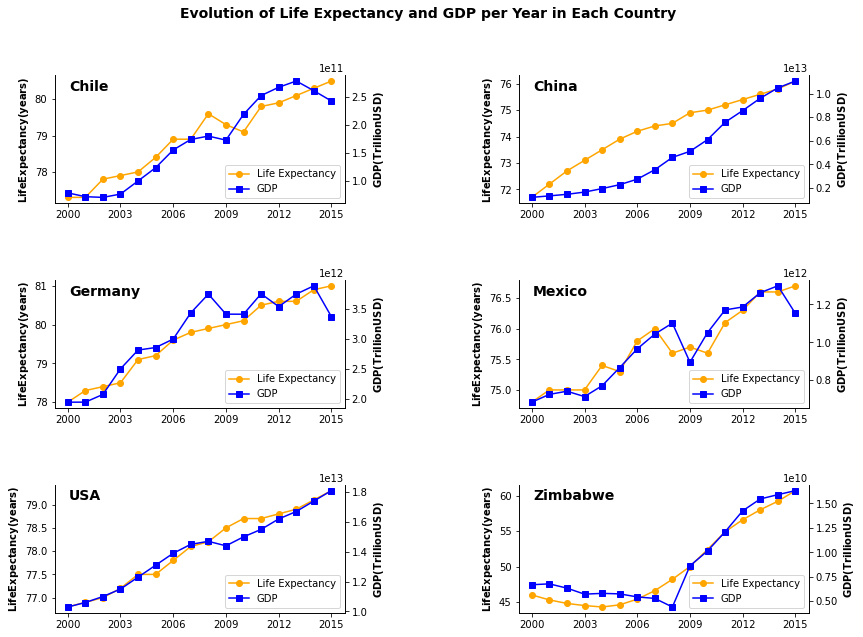

In [12]:
# Define the figure grid and its title
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 10))
axs = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.suptitle('Evolution of Life Expectancy and GDP per Year in Each Country', fontsize=14, fontweight='bold')

#  Iterate through countries and create subplots to compare life expectancy and GDP trends
for i, (ax, country) in enumerate(zip(axs, countries)):
    data = lifeex[lifeex['Country'] == country]
    
    # Plot each graph in its own subplot
    g1 = ax
    g1.plot('Year', 'LifeEx', data=data, color='orange', marker='o', label='Life Expectancy')
    g1.set_xticks(range(2000, 2016, 3))
    
    # Plot GDP on a twin axis
    g2 = g1.twinx()
    g2.plot('Year', 'GDP', data=data, color='blue', marker='s', label='GDP')
    
    # Set Y axis labels and colors
    g1.set_ylabel(r'$\mathbf{Life Expectancy (years)}$', color='black')
    g1.tick_params(axis='y', colors='black')
    
    g2.set_ylabel(r'$\mathbf{GDP (Trillion USD)}$', color='black')
    g2.tick_params(axis='y', colors='black')
    
    # Add country names 
    ax.annotate(country, xy=(0.05, 0.88), xycoords='axes fraction', 
                fontsize=14, fontweight='bold', color='black')

    # Remove spines and top ticks
    ax.spines['top'].set_visible(False)
    g2.spines['top'].set_visible(False)
    ax.tick_params(axis='x', bottom=True, top=False)
    
    # Legends
    lines, labels = g1.get_legend_handles_labels()
    lines2, labels2 = g2.get_legend_handles_labels()
    g2.legend(lines + lines2, labels + labels2, loc='lower right')

# Adjust spacing
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Add some space between subplots
plt.subplots_adjust(wspace=0.6, hspace=0.6)

# Show the plot
plt.show()

**Summary:**<br>
- GDP increases by year for most countries (excl. Zimbabwe), suggesting a positive relationships. <br>
- Life expectancy (orange) follows GDP (blue) for most parts, suggesting a positive correlation between the two variables.

### Plotting Average GDP by Year (Time Trend)

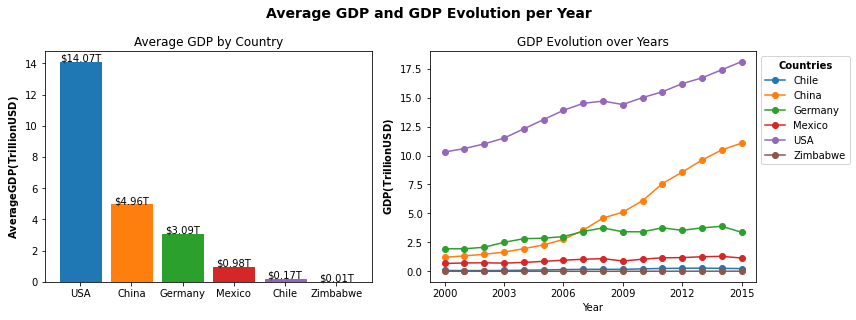

In [13]:
# Define the figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Average GDP and GDP Evolution per Year', fontsize=14, fontweight='bold')

# Find average GDP for each country
gdp_means = lifeex.groupby('Country')['GDP'].mean().sort_values(ascending=False)

# First subplot (Bar plot)
bars = ax1.bar(gdp_means.index, gdp_means.values)
ax1.set_ylabel(r'$\mathbf{Average GDP (Trillion USD)}$')
yticks = ax1.get_yticks()[:-1]
yticklabels = [f'{tick/1e12:.0f}' for tick in yticks]
ax1.set(yticks=yticks, yticklabels=yticklabels)

for bar, xlabel, color in zip(bars, gdp_means.index, custom_palette):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    ax1.text(x=bar_x, y=bar_y + 0.05e12, s=f"${gdp_means[xlabel] / 1e12:.2f}T", ha='center', color='black')
    bar.set_color(custom_palette[color])

# Second subplot (Line plots)
ax2.set_ylabel(r'$\mathbf{GDP (Trillion USD)}$')
ax2.set_yticks(np.arange(0, 18.5e12, 2.5e12))
ax2.set_yticklabels([f'{tick/1e12:.1f}' for tick in ax2.get_yticks()])
ax2.set_xlabel('Year')
ax2.set_xticks(range(2000, 2016, 3))

for country in countries:
    data = lifeex[lifeex['Country'] == country]
    line = ax2.plot(data.Year, data.GDP, marker='o', label=country)  # Capture the line object
    # You can also use 'line[0]' to access the first element of the list 'line'
    
# Add title and legend
ax1.set_title('Average GDP by Country')
ax2.set_title('GDP Evolution over Years')

# Specify the handles and labels for the legend explicitly
handles, labels = ax2.get_legend_handles_labels()
legend_ax2 = ax2.legend(handles, labels, loc='upper left')

# Move the legend outside of the figure
legend_ax2.set_bbox_to_anchor((1, 1))
legend_ax2.set_title('Countries', prop={'weight': 'bold'})

# Add some space between subplots
plt.subplots_adjust(wspace=0.3)

# Adjust the top parameter to create extra space above the subplots / below the suptitle
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()

**Summary:** <br>
- *USA:* A stark contrast is evident in the average GDP of the United States compared to the other countries in the dataset. In addition, it exhibits a clear upward trajectory, similiar to China, but in contrast to Germany and Mexico.<br>
- *China:* China's GDP showcases remarkable growth over time. Initially ranking third and closely aligned with the other nations, China's GDP experiences rapid exponential expansion. As a result, it ascends to the second position and diverges significantly from the initial group, progressively approaching the GDP of the United States.<br>
- *Zimbawe & Chile:* In contrast, Zimbabwe and Chile exhibit negligible GDP values, hardly discernible on both graphs due to the Trillions of US Dollars scale.<br>

### Plotting Average Life Expectancy by Year (Time Trend)

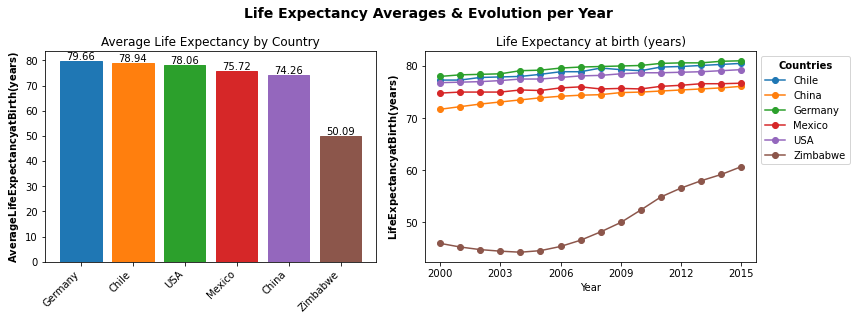

In [14]:
# Define the figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Life Expectancy Averages & Evolution per Year', fontsize=14, fontweight='bold')

# Find average Life Expectancy for each country
LifeEx_means = lifeex.groupby('Country')['LifeEx'].mean().sort_values(ascending=False)

# First subplot (Bar plot)
bars = ax1.bar(LifeEx_means.index, LifeEx_means.values) 
ax1.set_ylabel(r'$\mathbf{Average Life Expectancy at Birth (years)}$')
ax1.set_xticks(range(len(LifeEx_means.index)))
ax1.set_xticklabels(LifeEx_means.index, rotation=45, ha='right')
ax1.set_yticks(np.arange(0, 90, 10))  # Adjust the range as needed

for bar, xlabel, color in zip(bars, LifeEx_means.index, custom_palette):
    bar_x = bar.get_x() + bar.get_width() / 2
    bar_y = bar.get_height()
    ax1.text(x=bar_x, y=bar_y + 0.5, s=f"{LifeEx_means[xlabel]:.2f}", ha='center', color='black')
    bar.set_color(custom_palette[color])

# Second subplot (Line plots)
ax2.set_ylabel(r'$\mathbf{Life Expectancy at Birth (years)}$')
ax2.set_yticks(np.arange(0, 90, 10))  # Adjust the range as needed
ax2.set_xlabel('Year')
ax2.set_xticks(range(2000, 2016, 3))

for country in countries:
    data = lifeex[lifeex['Country'] == country]
    line = ax2.plot(data.Year, data.LifeEx, marker='o', label=country)  # Capture the line object
    
# Add title and legend
ax1.set_title('Average Life Expectancy by Country')
ax2.set_title('Life Expectancy at birth (years)')

# Specify the handles and labels for the legend explicitly
handles, labels = ax2.get_legend_handles_labels()
legend_ax2 = ax2.legend(handles, labels, loc='upper left')

# Move the legend outside of the figure
legend_ax2.set_bbox_to_anchor((1, 1))
legend_ax2.set_title('Countries', prop={'weight': 'bold'})

# Adjust the top parameter to create extra space above the subplots / below the suptitle
plt.tight_layout(rect=[0, 0.1, 1, 1])

# Show the plot
plt.show()

**Summary:** <br>
- *Zimbabwe:* Visualizing the Life Expectancy for each country on a single graph reveals a significant contrast between Zimbabwe and other countries. Zimbabwe's average life expectancy stands at approximately 50 years, while the remaining countries have an average life expectancy of around 77 years. This notable discrepancy raises substantial concerns about the quality of life in Zimbabwe compared to the global average.

## Evolution of GDP & Life Expectancy Distributions per Year

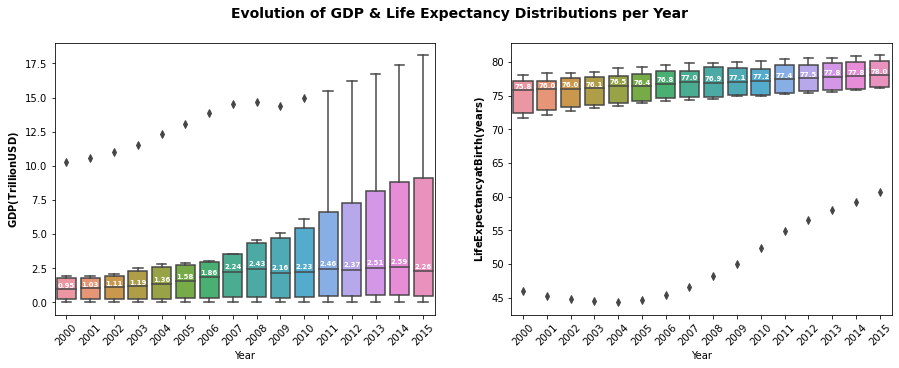

In [15]:
# Define figure grid and its title
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Evolution of GDP & Life Expectancy Distributions per Year', fontsize=14, fontweight='bold')

# Box plot: GDP per Year
axs[0] = plt.subplot(121)
g1 = sns.boxplot(data=lifeex, x='Year', y='GDP')
g1.set_ylabel(r'$\mathbf{GDP (Trillion USD)}$')
plt.xticks(rotation=45)

# Change Y-axis labels to the Trillion scale
yticks = g1.get_yticks()
ylabels = [tick / 1e12 for tick in yticks]
plt.yticks(ticks=yticks[1:-1], labels=ylabels[1:-1])

# Show median values in the graph
g1_medians = lifeex.groupby(lifeex['Year'])['GDP'].median()
g1_medians = [median / 1e12 for median in g1_medians]

for xtick in g1.get_xticks():
    g1.text(xtick, g1_medians[xtick] * 1.1e12, f'{g1_medians[xtick] :.2f}', horizontalalignment='center',size='x-small',color='w',weight='semibold')
    
# Box plot: Life Expectancy at Birth per Year
axs[1] = plt.subplot(122)
g2 = sns.boxplot(data=lifeex, x='Year', y='LifeEx')
g2.set_ylabel(r'$\mathbf{Life Expectancy at Birth (years)}$')
plt.xticks(rotation=45)

# Show median values in the graph
g2_medians = lifeex.groupby(lifeex['Year'])['LifeEx'].median()

for xtick in g2.get_xticks():
    g2.text(xtick, g2_medians.iloc[xtick] + 0.3, f'{g2_medians.iloc[xtick] :.1f}', horizontalalignment='center',size='x-small',color='w',weight='semibold')

**Summary:** <br>
*GDP:*
- Median GDP consistently increases until 2008.
- Decline in general GDP observed in 2009 due to the 2008 financial crisis.
- Median GDP faces challenges in recovery post-2009.
- Notable upper outlier indicates a substantial GDP gap between the United States and other nations.
- Interquartile range progressively widens over time, giving a false impression of convergence.
- Chinese GDP growth stands out as it exceeds the lower bound group, moving closer to the US GDP.<br>

*Life Expectancy:* 
- Median Life Expectancy demonstrates a consistent upward trend.
- Interquartile range consistently decreases over the years.
- Indicative of improving and converging Life Expectancies across dataset countries.
- Lower bound outlier highlights Zimbabwe's significantly different Life Expectancy.

## Growth of GDP & Life Expectancy

In [16]:
# Calculate growth rates by country
lifeex_growth = lifeex.sort_values(by='Year').groupby('Country')\
                .agg(gdp_growth=('GDP', lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]),
                leb_growth=('LifeEx', lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0]))
display(lifeex_growth)

,gdp_growth,leb_growth
Country,,
Chile,2.11,0.04
China,8.13,0.06
Germany,0.73,0.04
Mexico,0.69,0.03
USA,0.76,0.03
Zimbabwe,1.44,0.32


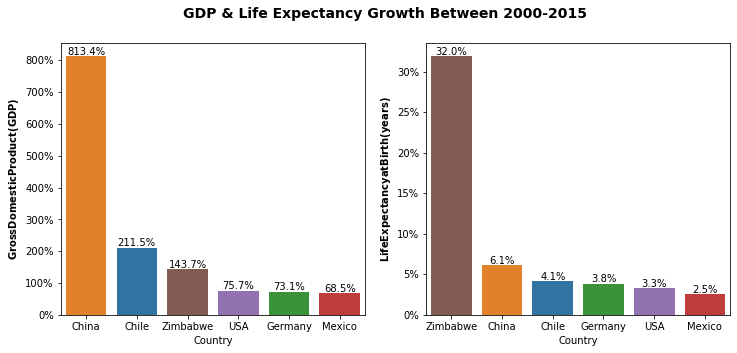

In [17]:
# Define figure grid and its title
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('GDP & Life Expectancy Growth Between 2000-2015', fontsize=14, fontweight='bold')

# Plot GDP Bar Graph
ax1 = plt.subplot(121)
order = [country for country in lifeex_growth.sort_values(by='gdp_growth', ascending=False).index]
sns.barplot(x=lifeex_growth.index, y=lifeex_growth.gdp_growth, palette=custom_palette, order=order)

# Set Y-axis' labels to percentage
ax1.set_ylabel(r'$\mathbf{Gross Domestic Product (GDP)}$')
yticks = ax1.get_yticks()
ylabels = [f'{tick * 100 :.0f}%' for tick in yticks]
ax1.set(yticks=yticks[:-1], yticklabels=ylabels[:-1])

# Include values for each bar
for label in ax1.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax1.text(x=xtick, y=lifeex_growth.loc[xlabel, 'gdp_growth'] + 0.05, s=f"{lifeex_growth.loc[xlabel, 'gdp_growth'] * 100 :.1f}%", horizontalalignment='center')

# Plot Life Expectancy Bar Graph
ax2 = plt.subplot(122)
order = [country for country in lifeex_growth.sort_values(by='leb_growth', ascending=False).index]
sns.barplot(x=lifeex_growth.index, y=lifeex_growth.leb_growth, palette=custom_palette, order=order)

# Set Y-axis' labels to percentage
ax2.set_ylabel(r'$\mathbf{Life Expectancy at Birth (years)}$')
yticks = ax2.get_yticks()
ylabels = [f'{tick * 100 :.0f}%' for tick in yticks]
ax2.set(yticks=yticks[:-1], yticklabels=ylabels[:-1])

# Include values for each bar
for label in ax2.get_xticklabels():
    xtick = label.get_position()[0]
    xlabel = label.get_text()
    ax2.text(x=xtick, y=lifeex_growth.loc[xlabel, 'leb_growth'] + 0.002, s=f"{lifeex_growth.loc[xlabel, 'leb_growth']* 100 :.1f}%", horizontalalignment='center')

**Summary:**<br>
*GDP Growth Analysis:*
  - China's GDP experienced extraordinary growth of over 800% between 2000 and 2015.
  - This growth is approximately 4 times larger than the second-highest growth rate and 12 times larger than the lowest growth rate.
  - China's initial proximity to the rest of the group accentuates the significant nature of its growth.
  - China also ranks second in Life Expectancy's growth, indicating a correlation between GDP and Life Expectancy.

*Life Expectancy Growth Analysis:*
  - Zimbabwe's Life Expectancy exhibited remarkable growth of 32% over a span of 15 years.
  - This growth rate is 5 times greater than China's and nearly 13 times greater than Mexico's.
  - Zimbabwe's exceptional growth is especially noteworthy considering its prior substantial distance from the rest of the group.